# Color Conversion and Smoothing

## Color Conversion

Often we would need to convert between color spaces for ease of computation or other reasons  
Following are the conversions we will discuss    
>Grayscale to Binary  
>RGB to Grayscale

### Grayscale to Binary

To convert grayscale images to binary, we use the technique of **Thresholding**  
A look into the algorithm  
>Set a threshold for the pixel intensity value  
>Iterate through the whole image matrix, assigning a ‘0’ to values below the threshold and a ‘1’ to values above the threshold  

Implementation of this algorithm isn't really necessary  
OpenCV comes with built in commands to take care of this


Actual Image


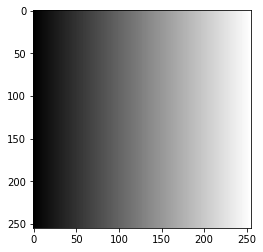

Thresholded Image


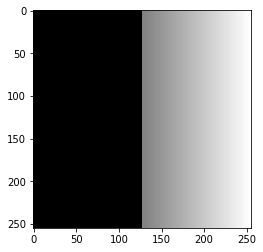

In [90]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('Images/grade.jpg',0)
print('Actual Image')
plt.imshow(img,cmap = 'gray')
plt.show()

ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
print('Thresholded Image')
plt.imshow(thresh,cmap = 'gray')
plt.show()


Now try out the following commands:

cv2.THRESH_BINARY_INV  
cv2.THRESH_TRUNC  
cv2.THRESH_TOZERO  
cv2.THRESH_TOZERO_INV  

In [11]:
## Your code here

### RGB to Grayscale

We now look at converting an RGB image to grayscale  
>One method is to find the mean of R,G and B channels  
>Gray = R/3 + G/3 + B/3  
>Think: Why does (R+G+B)/3 not work?  

This is called the mean method

The other method is the luminosity method  
>The human eye is not equally sensitive to the red, green and blue  
>So we take a weighted mean of the three channels 
>The weights correspond to the sensitivity of the human eye to each color  
>Gray = 0.21R + 0.72G + 0.07*B

Original Image


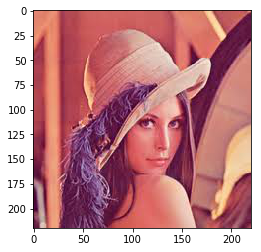

Grayscale Using Mean Method


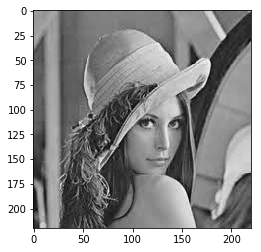

Grayscale Using Luminosity Method


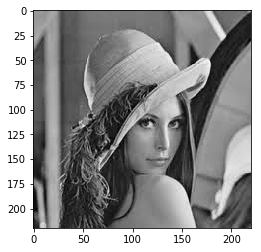

In [16]:
img = cv2.imread('Images/lena.jpg',1)

blue = img[:,:,0]
green = img[:,:,1]
red = img[:,:,2]
mean = (0.33*blue + 0.33*green + 0.33*red).astype('uint8')
lumin = (0.07*blue + 0.72*green + 0.21*red).astype('uint8')

print('Original Image')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

print('Grayscale Using Mean Method')
plt.imshow(mean,cmap = 'gray')
plt.show()

print('Grayscale Using Luminosity Method')
plt.imshow(lumin,cmap = 'gray')
plt.show()


There isn't much difference between the mean and the luminosity in this case  
This is probably becuase there is very little green component in the image

## Extraction of a Particular Color from an Image

We now look at color extraction  
For the purpose of the same we will now look at the HSV color space  
HSV color space is much easier to deal with in some scenarios  

If  RGB was in Cartesian Coordinates, HSV is a cylindrical coordinate system  
Here the system is based on human interpretation of color  
>Hue refers to a pure color, like red or yellow or green  
>Saturation refers to how much the color is diluted by white light  
>Intensity is a subjective descriptor that says how bright that pixel is  

![RGB Image Representation](Images/HSV.png)

### Bitwise Operations of Images

To extract a particular color, we first define the region (by its HSV range)  
Then we create a mask of these values  
Then the mask is applied on the image to get the required values  

To 'Apply' the mask, we use bitwise operations on images  
In this case this is a **bitwise AND operation**

Original Image


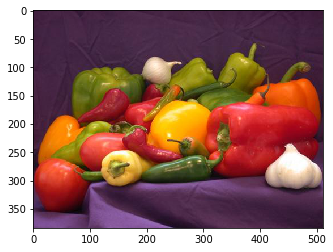

Mask


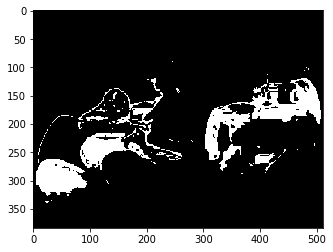

Red Channel


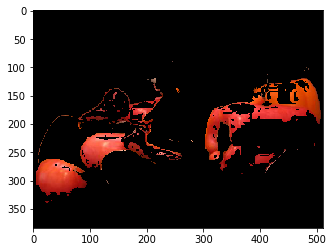

In [31]:
img = cv2.imread('Images/red.jpg',1)

hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
lower_color = np.array([0,100,100])
upper_color = np.array([10,255,255])
mask = cv2.inRange(hsv, lower_color, upper_color)
out = cv2.bitwise_and(img,img,mask=mask)

print('Original Image')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

print('Mask')
plt.imshow(mask,cmap = 'gray')
plt.show()

print('Red Channel')
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))
plt.show()

Let's have a look at the 300th row just to see what values it holds

In [32]:
print(mask[300])

[  0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

## Blurring and Smoothing an Image

Look at the image below

![](Images/Picture1.png)

Try looking at it with eyes half closed  
It looks much better, doesn't it?  
This is effectively what smoothing an image is!  

### Let's now try to implement a Gaussian Blur

For a Gaussian Blur, we take a 2D Gausssian Kernel of appropriate size  
Here, we take a 5x5 matrix for convenience  
The Gaussian kernel is slid across the image  

Gaussian Kernel Used is: 
[[0.0625 0.0625 0.0625 0.0625 0.0625]
 [0.25   0.25   0.25   0.25   0.25  ]
 [0.375  0.375  0.375  0.375  0.375 ]
 [0.25   0.25   0.25   0.25   0.25  ]
 [0.0625 0.0625 0.0625 0.0625 0.0625]]
Original Image


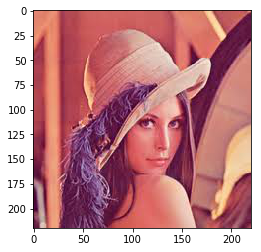

Blurred Image


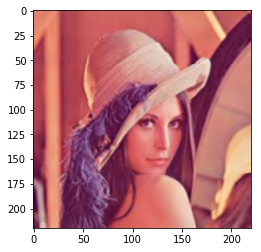

In [92]:
img = cv2.imread('Images/lena.jpg')
blur = cv2.GaussianBlur(img,(3,3),0) # Here (5,5) refers to a Gaussian kernel of size 5x5 of zero variance

kernel_1D = cv2.getGaussianKernel(5,0)
print('Gaussian Kernel Used is: ')
kernel_2D = np.repeat(kernel_1D,5)
kernel_2D = np.reshape(kernel_2D,(5,5))
print(kernel_2D)

print('Original Image')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

print('Blurred Image')
plt.imshow(cv2.cvtColor(blur,cv2.COLOR_BGR2RGB))
plt.show()

### How do we apply a Gaussian kernel to an image?

For this we slide the Gaussian matrix across the image pixel by pixel  
At each point we calculate an element wise product and replace the centre pixel value with the calculated value  

![](Images/corr_gif.gif)  

### What is the use of the Gaussian Kernel?

The Gaussian Kernel is mostly used to soften a very sharp image  
It is also used to denoise an image  

Consider the grainy image shown below:  

![](Images/noisy_2.jpg)  

Let's apply a Gaussian blur and see what happens!

Blurred Image


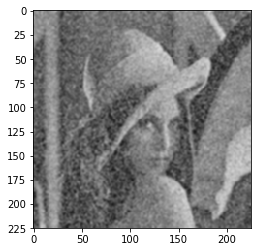

In [66]:
img = cv2.imread('Images/noisy_2.jpg')
blur = cv2.GaussianBlur(img,(5,5),0) # Here (5,5) refers to a Gaussian kernel of size 5x5 of zero variance

print('Blurred Image')
plt.imshow(cv2.cvtColor(blur,cv2.COLOR_BGR2RGB))
plt.show()

Looks much better doesn't it?

### Let's now look at a Median Blur  

Here we replace the piel with the median of the pixels around it  
This is especially useful for images with salt and pepper noise as seen in the noisy image  


Original Image


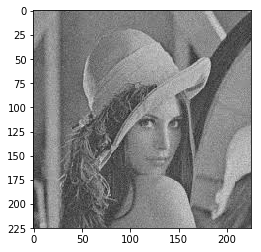

Blurred Image


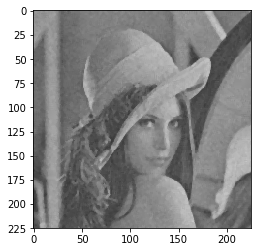

In [69]:
#Median Blur

img = cv2.imread('Images/noisy_lena.jpg')
blur2 = cv2.medianBlur(img,(3)) # Here (5,5) refers to a Gaussian kernel of size 5x5 of zero variance

print('Original Image')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

print('Blurred Image')
plt.imshow(cv2.cvtColor(blur2,cv2.COLOR_BGR2RGB))
plt.show()

## Sharpening an Image  

Contrary to blurring, here we want to make an image 'sharper'  

What do we mean by 'sharper'?  
We just accentuate the difference between the pixel instensity values  

orginal image


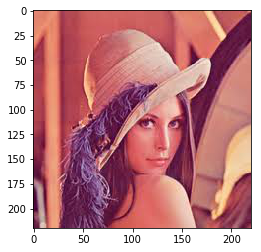

sharpened image


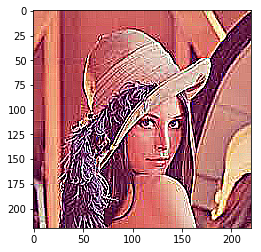

In [77]:
import cv2
import numpy as np
# Reading in and displaying our image
image = cv2.imread('Images/lena.jpg')

print('orginal image')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()
# Create our shapening kernel, it must equal to one eventually
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
# applying the sharpening kernel to the input image & displaying it.
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

print('sharpened image')
plt.imshow(cv2.cvtColor(sharpened,cv2.COLOR_BGR2RGB))
plt.show()

## Playing with Filters

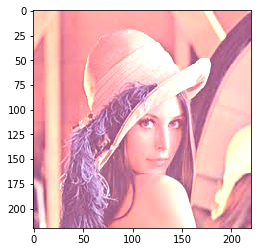

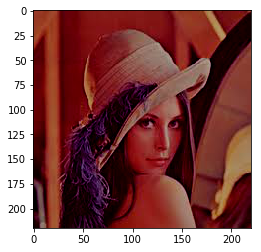

In [83]:
import numpy as np

matrix = np.ones(image.shape, dtype = "uint8") * 75
# We use the matrix to add to our image
added = cv2.add(image, matrix)
plt.imshow(cv2.cvtColor(added,cv2.COLOR_BGR2RGB))
plt.show()

subtracted = cv2.subtract(image, matrix)
plt.imshow(cv2.cvtColor(subtracted,cv2.COLOR_BGR2RGB))
plt.show()
